#  <center>Notes on Euler-Maruyama and Milstein Discretizations </center>
### <center>Aditya Bawane</center>

## Introduction

In the following we will deal with quantities of the type $f(t, S_t)$ that are a function of time $t$ (explicitly) and an underlying $S_t$ (which is itself time dependent). We will use the following notation:

$$\begin{aligned}
\frac{\partial f(t,S_t)}{\partial t} &\equiv \dot{f}, \\
\frac{\partial f(t,S_t)}{\partial S_t} &\equiv f'.
\end{aligned}$$
We start by reminding ourselves of **Ito's lemma**. Let $S_t$ have the dynamics $dS_t = a(t,S_t)dt + b(t,S_t) dW_t$, then the dynamics of a function $f(t, S_t)$ is given by
$$
df(t, S_t) = \left[\dot{f} + a(t,S_t)f' + \frac{b^2(t,S_t)}{2}f''\right]dt + b(t,S_t)f'dW_t.
$$
This follows simply from Taylor expanding $f$ up to second order and using $dW_t\cdot dW_t = dt$, and thereafter discarding all higher order terms.

**The problem**: We are given a process $dS_t = a(t,S_t)dt + b(t,S_t) dW_t$,  and we would like to computationally produce instances of $S_t$ given an initial value $S_0$. To do this, the total time interval of interest $[0,T]$ is divided into $N$ equal sub-intervals of duration $\Delta t = T/N$, and the problem reduces to that of evaluating
$$
S_{t+\Delta t} = S_t + \int_t^{t+\Delta t}a(u,S_u)du + \int_t^{t+\Delta t} b(u,S_u) dW_u
$$
over each sub-interval, and even more specifically, numerically evaluating the two integrals on the right-hand side in each sub-interval.

In the following, we will introduce two popular discretization methods: Euler-Maruyama and Milstein. These will be illustrated using the Black-Scholes model. For this model the analytical solution is known, allowing us to explicitly study the issues of errors and convergence.

## Discretization methods

We look at two discretization schemes in this notebook: the Euler-Maruyama (E-M) and the Milstein  discretizations.

**Euler-Maruyama discretization:**

This is an extension of the well-known Euler approximation to stochastic variables: an integral over a deterministic variable is approximated by the area of a rectangle of width $\Delta t$ and height evaluated at the left-end of the interval, so that $\int_{t}^{t+\Delta t} a(u,S_u)du \approx a(t,S_t)\cdot\Delta t$. The only novel bit is extending this to the stochastic variable:
$$
\begin{aligned}
\int_t^{t+\Delta t} b(u,S_u) dW_u &\approx b(t,S_t)(W(t+\Delta t) - W(t)) \\
&= b(t,S_t)\cdot\sqrt{\Delta t}\cdot Z_t
\end{aligned}
$$
where $Z_t$ is drawn from a standard normal distribution. (Notation: $Z_t$ is not a function of $t$. The subscript is meant to indicate its independence from $Z_{t'}$ for $t\neq t'$).

Putting all this together, we get
$$\boxed{
S_{t+\Delta t} \approx S_t + a(t,S_t)\cdot\Delta t + b(t,S_t)\cdot\sqrt{\Delta t}\cdot Z_t
}$$

In the case of Black-Scholes model, $dS_t = \mu S_tdt + \sigma S_t dW_t$, (i.e., $a(t,S_t) = \mu S_t$ and $b(t,S_t) = \sigma S_t$ where $\mu$ and $\sigma$ are constants) we get
$$
S_{t+\Delta t} = S_t\left(1 + \mu\Delta t + \sigma \sqrt{\Delta t} Z_t\right)
$$

**Milstein discretization:**

Note that one may apply Ito's lemma to $a(t,S_t)$ and $b(t,S_t)$ to obtain
$$\begin{aligned}
da_t &= \left(\dot{a} + aa' + \frac{b^2}{2}a''\right)dt + ba'dW_t, \\
db_t &= \left(\dot{b} + ab' + \frac{b^2}{2}b''\right)dt + bb'dW_t.
\end{aligned}$$

The integral $\int_t^{t+\Delta t}a(u,S_u)du$ can then be written as:
$$\begin{aligned}
\int_t^{t+\Delta t}a(u,S_u)du &= \int_{u=t}^{u=t+\Delta t}\left(a_t + \int_{s=t}^{s=u}\left(\dot{a}_s + a_sa_s' + \frac{1}{2}b_s^2a_s''\right)ds + \int_{s=t}^{s=u}b_sa_s'dW_s\right)du \\
&\approx a(t,S_t)\cdot\Delta t
\end{aligned}$$
where the second line is obtained by discarding terms of higher than first power in the differential of time. This may seem like overkill as we are ultimately left with what we got in the E-M scheme, and this should not be surprising. However, we get a more interesting result when quadratic power of stochastic variable is involved:
$$\begin{aligned}
\int_t^{t+\Delta t}b(u,S_u)dW_u &= \int_{u=t}^{u=t+\Delta t}\left(b_t + \int_{s=t}^{s=u}\left(\dot{b}_s + a_sb_s' + + \frac{1}{2}b_s^2b_s''\right)ds + \int_{s=t}^{s=u}b_sb_s'dW_s\right)dW_u \\
&\approx b(t,S_t)\cdot\sqrt{\Delta t}\cdot Z_t + b_tb_t'\int_{u=t}^{u=t+\Delta t}\int_{s=t}^{s=u}dW_s dW_u
\end{aligned}$$
where once again terms higher than first order in $dt$ were discarded and Euler-Maruyama scheme was applied on what remained. (Recall that a quadratic in $dW$ is linear in $dt$.) Let us look at the double stochastic integral:
$$\begin{aligned}
\int_{u=t}^{u=t+\Delta t}\int_{s=t}^{s=u}dW_s dW_u &= \int_{u=t}^{u=t+\Delta t}(W_u - W_t)dW_u \\
&= \int_{u=t}^{u=t+\Delta t}W_u dW_u - W_t(W_{t+\Delta t} - W_t)\\
&= \frac{1}{2}\left[ \left(W_{t+\Delta t} - W_t\right)^2 - \Delta t\right] = \frac{\Delta t}{2}(Z_t^2 - 1)
\end{aligned}$$
where $\int WdW  = \frac{W^2}{2} - \frac{t}{2} + \mathrm{const}$ has been used (as can be verified using Ito's lemma). Putting it all together we get:
$$\boxed{
S_{t+\Delta t} \approx S_t + a(t,S_t)\cdot\Delta t + b(t,S_t)\cdot\sqrt{\Delta t}\cdot Z_t + \frac{\Delta t}{2}\cdot(Z_t^2 - 1)\cdot b'(t,S_t)\cdot b(t,S_t).
}$$
Note that this would coincide with the Euler-Maruyama method if $b' = 0$, i.e., if the diffusion term did not depend on the underlying.

In case of the Black-Scholes model $dS_t = \mu S_tdt + \sigma S_t dW_t$, where $\mu$ and $\sigma$ are constants, we get
$$
S_{t+\Delta t} = S_t\left(1 + \mu\Delta t + \sigma \sqrt{\Delta t} Z_t + \frac{1}{2}\sigma^2(Z_t^2 - 1)\Delta t\right).
$$
We can expect to see a greater deviation between the results of the two methods for higher values of volatility $\sigma$.

An observation: One could write the Black-Scholes model in terms of the log returns as:
$$
d \ln S_{t} = \left(\mu - \frac{\sigma^2}{2}\right) dt + \sigma  dW_t.
$$
One can immediately see that the two discretizations of this form of the Black-Scholes model are identical. Integrating the above form gives us the exact solution:
$$
 S_{t} = S_0\exp\left[\left(\mu - \frac{\sigma^2}{2}\right) dt + \sigma  dW_t \right].
$$

## Example: The Black-Scholes Model

We now look at Euler-Maruyama and Milstein discretizations for the Black-Scholes model (in the form $dS_t = \mu S_tdt + \sigma S_t dW_t$) and compare their errors for a single instance. A more rigorous analysis of issues or errors and convergence are postponed to the next section.

In [116]:
import numpy as np
import matplotlib.pyplot as plt

We set below the drift, volatility, and the number of time sub-intervals for discretization:

In [117]:
T = 1
N = 1000      #number of time sub-intervals
mu = 1        #drift
sigma = 1.5   #volatility
S0 = 1
dt = T/N
t = np.linspace(0,T,N)

An increment in the Brownian process is evaluated as $\int_t^{t+\Delta t}dW_t = W_{t+\Delta t} - W_t = \sqrt{\Delta t}\cdot Z_t$. The entire Brownian path is obtained by summing these increments.

In [118]:
np.random.seed(5)
dW = np.concatenate(([0],np.sqrt(dt)*np.random.randn(N-1))) #brownian increments
W = dW.cumsum()  #brownian path

Using the exact solution to the Geometric Brownian motion process, we can compute the trajectory of $S_t$:

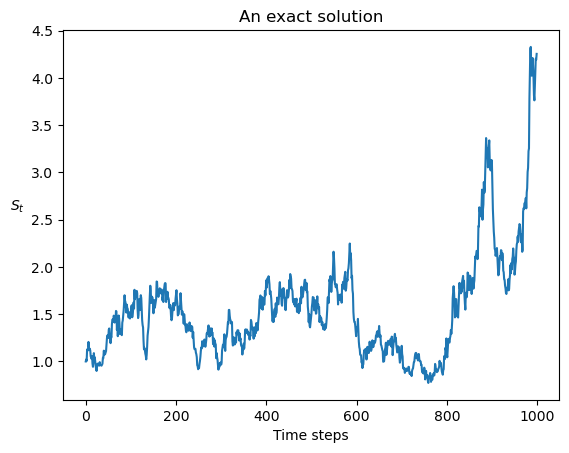

In [119]:
S = S0*np.exp((mu - 0.5*sigma**2)*t + b*W)
plt.xlabel("Time steps")
plt.ylabel("$S_t$",rotation = 0, labelpad = 10)
plt.title("An exact solution")
plt.plot(S);

We now implement the Euler-Maruyama discretization for the Black-Scholes model: $S_{t+\Delta t} = S_t\left(1 + \mu\Delta t + \sigma \sqrt{\Delta t} Z_t\right)$

In [120]:
S_em = []
S_em_i = S0
for i in range(N):
    S_em_i += S_em_i*(mu*dt + sigma*dW[i])
    S_em.append(S_em_i)

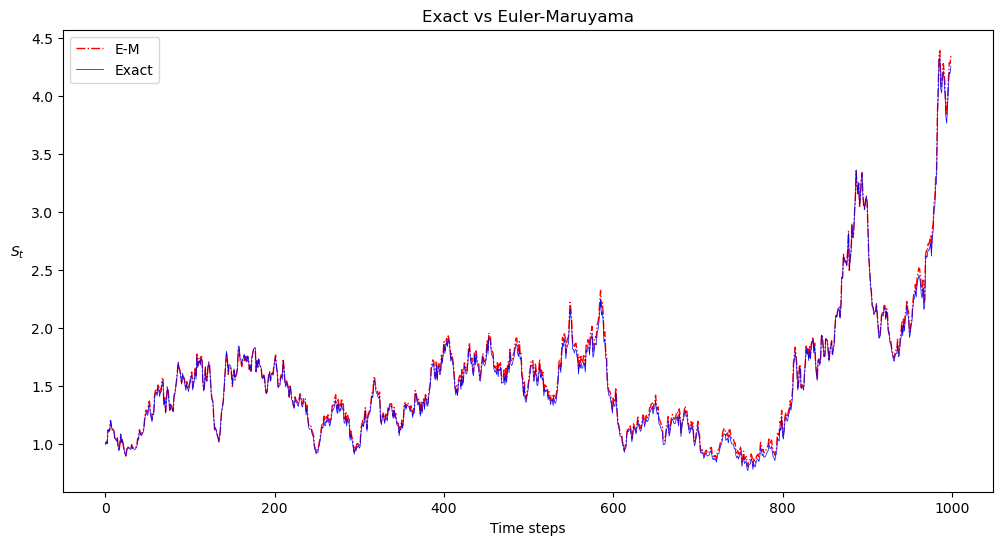

In [121]:
plt.figure(figsize=(12,6))
plt.plot(S_em, 'r-.', lw = 1, label = 'E-M')
plt.plot(S, 'b-', lw = 0.5, label = 'Exact')
plt.xlabel("Time steps")
plt.ylabel("$S_t$",rotation = 0, labelpad = 10)
plt.title("Exact vs Euler-Maruyama")
plt.legend()
plt.show()

It is clear that we do not have a complete overlap between the exact solution and the E-M discretization. We implement the Milstein discretization below: $S_{t+\Delta t} = S_t\left(1 + \mu\Delta t + \sigma \sqrt{\Delta t} Z_t + \frac{1}{2}\sigma^2(Z_t^2 - 1)\Delta t\right)$

In [122]:
S_mil = []
S_mil_i = S0
for i in range(N):
    S_mil_i += S_mil_i*(mu*dt + sigma*dW[i] + 0.5*sigma**2*(dW[i]**2 - dt))
    S_mil.append(S_mil_i)

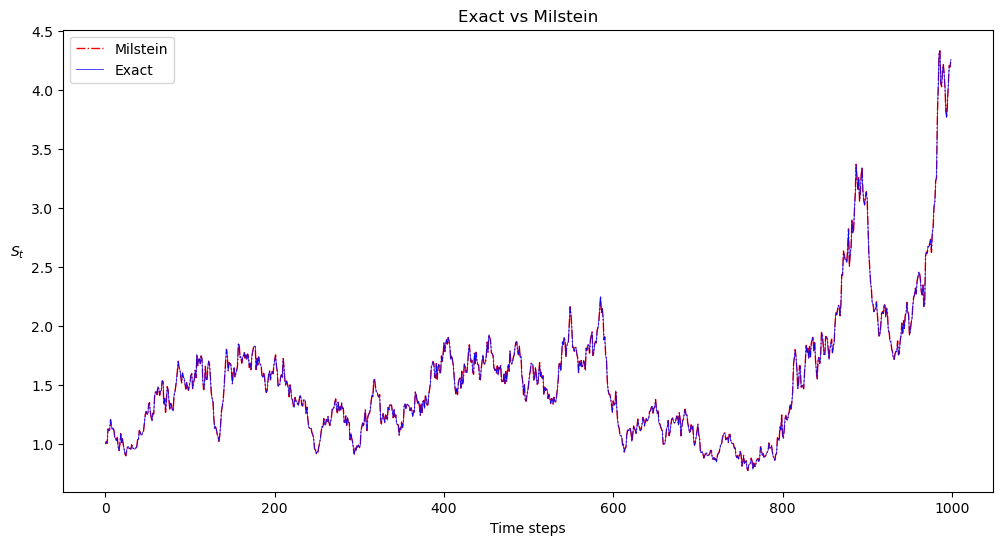

In [123]:
plt.figure(figsize=(12,6))
plt.plot(S_mil, 'r-.', lw = 1, label = 'Milstein')
plt.plot(S, 'b-', lw = 0.5, label = 'Exact')
plt.xlabel("Time steps")
plt.ylabel("$S_t$",rotation = 0, labelpad = 10)
plt.title("Exact vs Milstein")
plt.legend()
plt.show()

We see a much closer overlap of the Milstein discretization with the exact solution than in the E-M case. In the plot below, the data points corresponding to Milstein in red hug the exact solution more closely than do the blue dots corresponding to E-M (and it can be verified that the effect is more pronouced for higher $\sigma$):

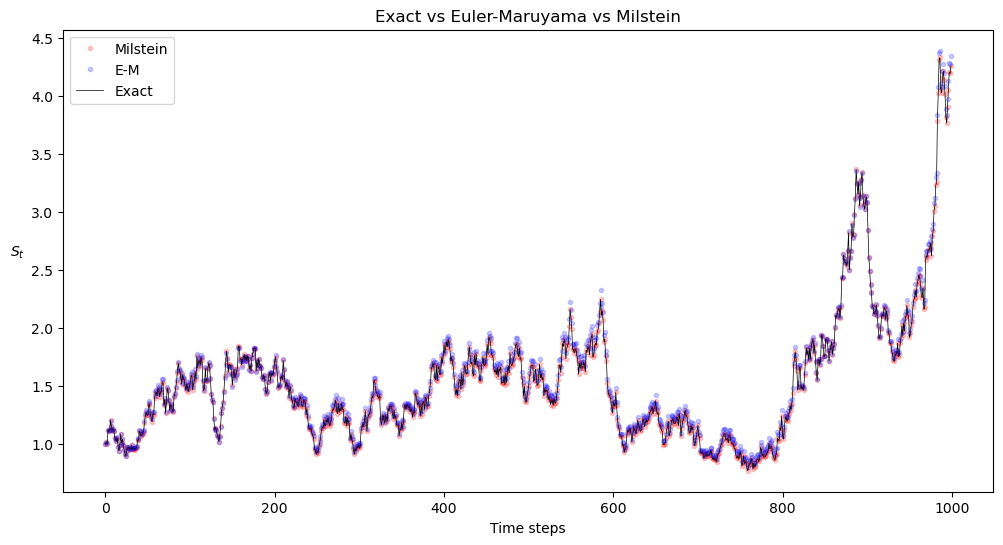

In [124]:
plt.figure(figsize=(12,6))
plt.plot(S_mil, 'r.', lw = 0.001, label = 'Milstein', alpha = 0.2)
plt.plot(S_em, 'b.', lw = 0.001, label = 'E-M', alpha = 0.2)
plt.plot(S, 'k-', lw = .5, label = 'Exact')
plt.xlabel("Time steps")
plt.ylabel("$S_t$",rotation = 0, labelpad = 10)
plt.title("Exact vs Euler-Maruyama vs Milstein")
plt.legend()
plt.show()

To visualize the trends in the error more clearly:

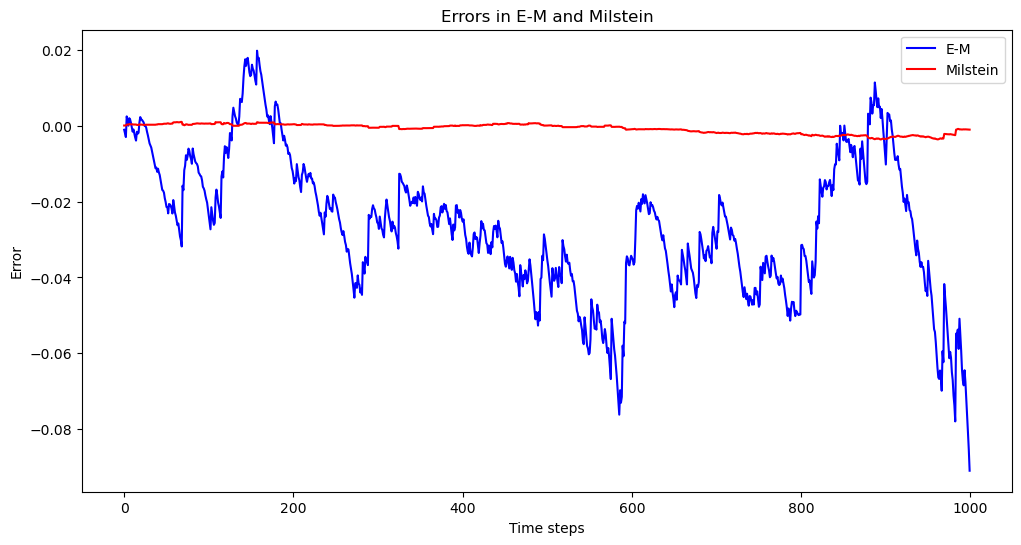

In [125]:
em_err = S - S_em
mil_err = S - S_mil

plt.figure(figsize=(12,6))
plt.plot(em_err, 'b', label = 'E-M')
plt.plot(mil_err, 'r', label = 'Milstein')
plt.xlabel("Time steps")
plt.ylabel("Error")
plt.title("Errors in E-M and Milstein")
plt.legend()
plt.show()

## Errors and Convergence

In this section, we define the notions of error and convergence more carefully, and examine these ideas for the two discretization methods.

There exist two notions of error used in comparing approximation methods:

**Weak error**:
$$
 \mathrm{Err}_\mathrm{weak}(\Delta t) = \sup_{t}|E(S_\mathrm{exact} - S_\mathrm{approx}(\Delta t))|
$$

**Strong error**:
$$
 \mathrm{Err}_\mathrm{strong}(\Delta t) = \sup_{t}E(|(S_\mathrm{exact} - S_\mathrm{approx}(\Delta t)|)
$$
The way the errors have been defined above, they are defined for the entire time period $[0,T]$ (because we take a supremum over time), rather than pointwise at each $t$. Roughly speaking, the worst error on the interval $[0,T]$ is assigned to be the error of the approximation method for a given choice of subinterval division $\Delta t$. For some other applications, such as option pricing, one could also define weak/strong error at the endpoint, in which case we do not take the supremum and just evaluate the remaining expression at $t = T$.

When evaluating these errors numerically, as we will do below, the expectation values are computed by simulating a large set of samples of the process and their approximations: for weak error we have
$$
 \mathrm{Err}_\mathrm{weak}(\Delta t) \approx \frac{1}{\mathrm{\# samples}}\max_{t}\left|\sum_{j \in \textrm{samples}}(S^{(j)}_\mathrm{exact} - S^{(j)}_\mathrm{approx}(\Delta t))\right|
$$
and for strong error we have
$$
 \mathrm{Err}_\mathrm{strong}(\Delta t) \approx \frac{1}{\mathrm{\# samples}}\max_{t}\sum_{j \in \textrm{samples}}\left|S^{(j)}_\mathrm{exact} - S^{(j)}_\mathrm{approx}(\Delta t)\right|.
$$

Note that strong error is always greater than or equal to the weak error (essentially because of triangular inequality: sum of absolute values is greater than absolute value of sum).

When might one use one definition of error over the other as a measure of accuracy? Note that to minimize the weak error, if suffices for the approximation to be close to the exact answer *on the average*: an approximation method  may over/underestimate the exact answer in different instances, but a low weak error would suggest that we are close to the exact answer on the average. For the strong error to be low, the approximation method would have to be close to the exact answer *in every instance* and not just on the average: as the absolute values are taken first before averaging, so overestimations and underestimations do not cancel out. Minimizing the weak error at the end point may be adequate, for example, in pricing European options. In some other applications it may not be enough to be close to the correct answer on the average, in which case strong error must be used.

Corresponding to the two definitions of errors there exist two notions of convergence: an approximation method is said to **converge weakly/strongly** with order $m$ if
$$
 \mathrm{Err}_\mathrm{weak/strong}(\Delta t) = O((\Delta t)^m)
$$
for sufficiently small $\Delta t$. As the interval size $\Delta t$ is reduced, an approximation method with a higher value of $m$ will converge much faster than one with lower value (in the weak or the strong sense, depending on the error used.)

We now state some mathematical results without proof (valid under some technical assumptions on the functions $a(t,S_t)$ and $b(t,S_t)$ that we will not go into): 

1. For the Euler-Maruyama method, the order of strong convergence  is 1/2 and the order of weak convergence is 1.
2. For the Milstein method, the order of strong convergence is 1 and the order of weak convergence is 1.

(Intuitively, the reason for the order of weak convergence for E-M method being higher than for strong convergence is that the leading order errors have opposite signs with equal probability and therefore cancel out.) We see that the Milstein scheme provides a higher order of strong convergence than the E-M scheme.

The results quoted above are quite general, and not just for the Black-Scholes model. However, we now try to computationally see some evidence of this is in the Black-Scholes case.

Credit: This following code is heavily borrowed from Hautahi Kingi: [Github](https://github.com/hautahi/sde_simulation), [blog](https://hautahi.com/sde_simulation)

In [126]:
samples = 100000
N_list = [2**i for i in range(3,10)]

strong_mil, weak_mil, strong_em, weak_em = [],[],[],[]

for N in N_list:
    dt = T/N
    t = np.linspace(0,T,N)
    em_abs_err_sum, mil_abs_err_sum, em_err_sum, mil_err_sum = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
    for s in range(samples):
        np.random.seed(s)
        dW = np.concatenate(([0],np.sqrt(dt)*np.random.randn(N-1)))
        W = dW.cumsum()

        S = S0*np.exp((mu - 0.5*sigma**2)*t + sigma*W)
        
        S_mil_i, S_em_i = S0, S0
        S_em, S_mil = [], []
        
        for i in range(N):
            S_em_i += S_em_i*(mu*dt + sigma*dW[i])
            S_em.append(S_em_i)
            S_mil_i += S_mil_i*(mu*dt + sigma*dW[i] + 0.5*sigma**2*(dW[i]**2 - dt))
            S_mil.append(S_mil_i)
        
    
        em_err_sum += S - S_em
        mil_err_sum += S - S_mil
        em_abs_err_sum += abs(S - S_em)
        mil_abs_err_sum += abs(S - S_mil)

    weak_em.append(max(abs(em_err_sum))/samples)
    weak_mil.append(max(abs(mil_err_sum))/samples)
    strong_em.append(max(em_abs_err_sum)/samples)
    strong_mil.append(max(mil_abs_err_sum)/samples)

The above code returns a vector of weak/strong errors for E-M/Milstein methods, whose elements correspond to various choices of number $N$ of intervals (equivalently, the reciprocal of the $\Delta t$). Slope of the log-log plot of the errors against $\Delta t$ gives us the order of convergence.

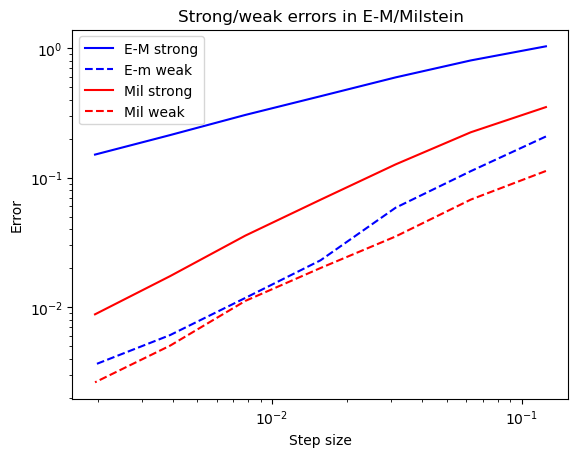

In [129]:
dt_list = T/np.array(N_list)

plt.loglog(dt_list, strong_em, label = 'E-M strong', color = 'blue')
plt.loglog(dt_list, weak_em, label = 'E-m weak', color = 'blue', ls = '--')

plt.loglog(dt_list, strong_mil, label = 'Mil strong', color = 'red')
plt.loglog(dt_list, weak_mil, label = 'Mil weak', color = 'red', ls = '--')
plt.xlabel("Step size")
plt.ylabel("Error")
plt.title("Strong/weak errors in E-M/Milstein")

plt.legend()
plt.show()

Unsurprisingly, the strong error is greater than the weak error in both the schemes. However, more interestingly, we clearly see that all errors decrease almost linearly with with a decrease in $\Delta t$ on the log-log scale, and that the E-M strong error decreases much more slowly with a decrease in $\Delta t$ than the other three, all of which seem to decay at the same rate (in the log-log sense). We can confirm this by linear regression:

In [130]:
from sklearn.linear_model import LinearRegression

log_dt_list = np.log(dt_list).reshape((-1,1))
log_strong_em = np.log(strong_em)
log_weak_em = np.log(weak_em)
log_strong_mil = np.log(strong_mil)
log_weak_mil = np.log(weak_mil)

em_s_fit = LinearRegression().fit(log_dt_list,log_strong_em)
em_w_fit = LinearRegression().fit(log_dt_list,log_weak_em)
mil_s_fit = LinearRegression().fit(log_dt_list,log_strong_mil)
mil_w_fit = LinearRegression().fit(log_dt_list,log_weak_mil)

print(f"E-M strong: score = {em_s_fit.score(log_dt_list,log_strong_em)}, slope = {em_s_fit.coef_}")
print(f"E-M weak: score = {em_w_fit.score(log_dt_list,log_weak_em)}, slope = {em_w_fit.coef_}")
print(f"Milstein strong: score = {mil_s_fit.score(log_dt_list,log_strong_mil)}, slope = {mil_s_fit.coef_}")
print(f"Milstein weak: score = {mil_w_fit.score(log_dt_list,log_weak_mil)}, slope = {mil_w_fit.coef_}")

E-M strong: score = 0.9973791566107983, slope = [0.46891805]
E-M weak: score = 0.995747465983778, slope = [1.01016782]
Milstein strong: score = 0.995598579724095, slope = [0.89869103]
Milstein weak: score = 0.9968177460066736, slope = [0.90786574]


The high score indicates a good fit to a straight line. We see that the slope corresponding to the E-M strong error is close to 0.5, while the slope is close to 1 for the other three cases, in accordance with the quoted general result. (Greater the sample size, better the fit.)

## Conclusion

The Euler-Maruyama and Milstein discretization schemes were described. The former is an extension of the very rudimentary left-point Euler approximation method used for definite integrals over non-stochastic variables. The latter includes an additional term at every step relative to the E-M scheme, arising from the stochastic dependence of the volatility on the underlying quantity.

We implemented the two schemes to the geometric Brownian motion of the Black-Scholes model. In this case the SDE can be integrated exactly, allowing us to study the errors of the two methods in a controlled manner. As expected, the Milstein method produces a much better approximation to the exact solution than the E-M method.

Finally, we introduced the notions of strong and weak errors for approximation methods. We analyzed the errors in the two methods in the Black-Scholes example, for a large sample and for varying step sizes, and see how errors shrink as the step size is shrunk. The trend  $\mathrm{Err}(\Delta t) \sim (\Delta t)^m$ was noted, and the coefficient $m$ estimated for the strong/weak error in the E-M/Milstein case.

## References

1. _Monte Carlo Methods in Financial Engineering_, Paul Glasserman
2. [Github](https://github.com/hautahi/sde_simulation) and [blog](https://hautahi.com/sde_simulation) by Hautahi Kingi
3. [Notes](https://frouah.com/finance%20notes/Euler%20and%20Milstein%20Discretization.pdf) by Fabrice Douglas Rouah
4. [Notes](https://math.gmu.edu/~tsauer/pre/sde.pdf) my Timothy Sauer